<a href="https://colab.research.google.com/github/djrl10/trying/blob/master/lstmtradisional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <strong>LSTM</strong>

In [17]:
try:
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive/
Note: using Google CoLab


Sigmoid


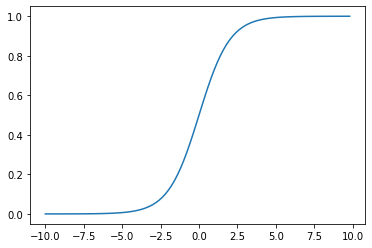

Hyperbolic Tangent(tanh)


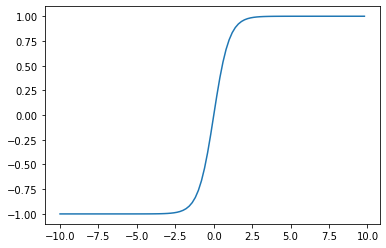

In [18]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

def f2(x):
    a = []
    for item in x:
        a.append(math.tanh(item))
    return a

x = np.arange(-10., 10., 0.2)
y1 = sigmoid(x)
y2 = f2(x)

print("Sigmoid")
plt.plot(x,y1)
plt.show()

print("Hyperbolic Tangent(tanh)")
plt.plot(x,y2)
plt.show()

In [19]:
import pandas as pd
import os

df = pd.read_csv("/content/drive/My Drive/data2/kc1.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
X_train

array([[ 1.,  1.,  1., ...,  3.,  1.,  1.],
       [19.,  2.,  1., ...,  0.,  0.,  3.],
       [ 1.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 7.,  2.,  1., ...,  8.,  4.,  3.],
       [ 3.,  1.,  1., ...,  1.,  0.,  1.],
       [ 2.,  1.,  1., ...,  4.,  1.,  1.]])

In [23]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
 
# generate and prepare the dataset
def get_data():
	# generate dataset
	X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
	# split into train and test
	n_test = 500
	trainX, testX = X[:n_test, :], X[n_test:, :]
	trainy, testy = y[:n_test], y[n_test:]
	return trainX, trainy, testX, testy
 
# define and fit the model
def get_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(100, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=300, verbose=0)
	return model
 
# generate data
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)
 
 
# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.848000
Precision: 0.849206
Recall: 0.849206
F1 score: 0.849206
